# FAKE NEWS PREDICTION

In [1]:
#we have labelled data and aim of the project is to predict the fakenews

In [2]:
#Dataset Description
#train.csv: A full training dataset with the following attributes:

#id: unique id for a news article
#title: the title of a news article
#author: author of the news article
#text: the text of the article; could be incomplete
#label: a label that marks the article as potentially unreliable
#1: unreliable- fake news
#0: reliable-not fake news
#test.csv: A testing training dataset with all the same attributes at train.csv without the label.




In [3]:
#so in this data set we have most of the feature are labelled data
#so we are importing texting editing function
#removing stopwords which doesnot had meaning to the content of the data

#contol flow

data--data preprocessing-data analysis--data cleaning--splitting data---building the model and training--evaluation--
--predicting system


In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re## re--regular expression used for searching documents
from nltk.corpus import stopwords##corpus--body of the particular text(important text)
#nltk--natural languge tool kit(mens about the text)
#stopwords are the words which does add much value to a paragraph vertex(ex:a,an,articles,where,what)
from nltk.stem.porter import PorterStemmer##--stemming(it takes a word it removes the prefix and the suffix of the word
#and returns the root word of it)
from sklearn.feature_extraction.text import TfidfVectorizer##(Tfidfvectorizer-used to convert text into feature vectors.
# features vectors are numbers)

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#printing stopwords

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

above are the stop words which doesnt add any meaning in the content in the dataset
and during stemming process we remove all this stopwords

In [10]:
#data preprocessing

In [11]:
os.chdir('C:\\Users\\pavan\\Desktop\\data science course\\project\\project on classifier\\project file\\project 4 fake news\\train.csv')

In [12]:
data=pd.read_csv('train.csv')

In [13]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [14]:
#cheching the number of rows and columns

In [15]:
data.shape

(20800, 5)

In [16]:
#finding the missing value
#data cleaning

In [17]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [18]:
#finding the percentage of null values percent

In [19]:
a=data.isnull().sum()
b=len(data)
per=(a/b)*100

In [20]:
per

id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [22]:
data.title.mode()

0    Get Ready For Civil Unrest: Survey Finds That ...
1    The Dark Agenda Behind Globalism And Open Borders
Name: title, dtype: object

In [23]:
data.author.mode()

0    Pam Key
Name: author, dtype: object

In [24]:
data.text.mode()

0     
Name: text, dtype: object

In [25]:
#fillling the missing values

In [26]:
news_data=data.fillna('')#since all fetures depends on eachother,using mode can change the respective title and author and text

In [27]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [29]:
#merging two features(title and author) to get good accuracy for predicting fake news

In [30]:
news_data['content']=news_data['author']+' : '+news_data['title']

In [31]:
news_data

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus : House Dem Aide: We Didn’t Even...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn : FLYNN: Hillary Clinton, Big ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com : Why the Truth Might Get Y...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss : 15 Civilians Killed In Singl...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy : Iranian woman jailed for fict...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson : Rapper T.I.: Trump a ’Poster C...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman : N.F.L. Playoffs: Schedule, ..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams : Ma...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary : NATO, Russia To Hold Parallel Ex..."


In [32]:
#seperating data set

In [33]:
X=news_data.drop('label',axis=1)
y=news_data.label

In [34]:
X

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus : House Dem Aide: We Didn’t Even...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn : FLYNN: Hillary Clinton, Big ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com : Why the Truth Might Get Y...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss : 15 Civilians Killed In Singl...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy : Iranian woman jailed for fict...
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Jerome Hudson : Rapper T.I.: Trump a ’Poster C...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,"Benjamin Hoffman : N.F.L. Playoffs: Schedule, ..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Michael J. de la Merced and Rachel Abrams : Ma...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","Alex Ansary : NATO, Russia To Hold Parallel Ex..."


In [35]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

#stemming process--it takes a word removes prefix and suffix and gives only the root word

ex-actor,actress,acting as act

In [36]:
port_stem=PorterStemmer()

In [38]:
#creating a function

some cases we need to replicate a percticular code and cannot repeate every time ,to simply several line of code into simple
word.we create below stemming function

In [39]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)#sub-substitute certain values,^ (upper arrow)---indictes exclusion
    #in above case weare excluding every thing which is not alphebet.so we are writing (^a-zA-Z)
    #' ' is written so that all the number are being replaced by space 
    #content--since we feature should be mentioned
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [40]:
news_data['content']=news_data['content'].apply(stemming)

In [41]:
news_data

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,jerom hudson rapper trump poster child white s...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,benjamin hoffman n f l playoff schedul matchup...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,michael j de la merc rachel abram maci said re...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,alex ansari nato russia hold parallel exercis ...


In [42]:
#separating the data and taking only the value

In [43]:
X1=news_data.content.values
y1=news_data.label.values

In [44]:
X1

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [45]:
y1

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [46]:
# converting the categorical(words) into feature vector(numerical)


In [47]:
vectorizer=TfidfVectorizer()#-Tfidf-termfrequency-counts the number of word perticular repeating ina document
#(repeatation tells the word is very important and assign a perticular numerical value)
#tfi-find the number of times a significant word repeated and assign a number and this are called feature vectors
#inversedocumentfrequency-finds the repeated words which are not significant and reduces its importance

vectorizer.fit(X1)
X2=vectorizer.transform(X1)

In [48]:
print(X2)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [49]:
#splitting the data into traning and testing 

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,y1,test_size=0.2,stratify=y,random_state=2)

In [52]:
print(X_train)

  (0, 16996)	0.09995656818816077
  (0, 16928)	0.3360072514082535
  (0, 15295)	0.09807665903342763
  (0, 13914)	0.3334797245354899
  (0, 13014)	0.2680313811122545
  (0, 12501)	0.3929876463935473
  (0, 11936)	0.24142639024498436
  (0, 10306)	0.09662001419895176
  (0, 10219)	0.3019527708144002
  (0, 3155)	0.3400831511004003
  (0, 2794)	0.3776836172783757
  (0, 336)	0.3360072514082535
  (1, 16996)	0.07263181421455335
  (1, 15424)	0.22579404836928033
  (1, 15417)	0.26613170238131584
  (1, 15295)	0.07126580880898774
  (1, 13453)	0.3387500815971264
  (1, 11421)	0.3084666283145136
  (1, 10306)	0.07020736153621741
  (1, 10061)	0.24924889065491332
  (1, 9856)	0.3387500815971264
  (1, 5313)	0.2768869285533855
  (1, 2761)	0.3387500815971264
  (1, 2207)	0.3387500815971264
  (1, 956)	0.2855580802628186
  :	:
  (16637, 10008)	0.32617532466383187
  (16637, 9588)	0.184164927958451
  (16637, 8153)	0.3214731053599403
  (16637, 5009)	0.3538476463585765
  (16637, 1868)	0.40919228974806576
  (16637, 364)	0.

In [53]:
print(X_test)

  (0, 12801)	0.2910746804557067
  (0, 9818)	0.30786004182651133
  (0, 7668)	0.22945314906455008
  (0, 6816)	0.16094563145945953
  (0, 6289)	0.288254092437116
  (0, 5941)	0.288254092437116
  (0, 5233)	0.21316265672448448
  (0, 4346)	0.3250084367199054
  (0, 3395)	0.3301936745912874
  (0, 2959)	0.24534646237198773
  (0, 1667)	0.30373060380734146
  (0, 908)	0.213510750423647
  (0, 239)	0.34297808354766485
  (1, 16996)	0.09117761343372983
  (1, 15295)	0.08946281236254729
  (1, 14046)	0.42524648908354634
  (1, 13190)	0.36773046084789346
  (1, 12741)	0.24868518461414146
  (1, 12279)	0.3796661151115819
  (1, 12041)	0.37327055071909065
  (1, 10306)	0.08813410128297053
  (1, 8813)	0.42524648908354634
  (1, 4008)	0.23098933893199997
  (1, 3339)	0.2834482751186189
  (2, 16868)	0.344315415802567
  :	:
  (4158, 16782)	0.2796201559111399
  (4158, 13954)	0.2713157796360236
  (4158, 13918)	0.29432702492466434
  (4158, 13775)	0.21479309786895925
  (4158, 13600)	0.2496550139728973
  (4158, 11068)	0.2943

In [54]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [55]:
y_test

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [56]:
#building model (model1)
#LOGISTICREGRESSION

In [57]:
 from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
y1_predict=model.predict(X_test)
z1_predict=model.predict(X_train)

In [59]:
y1_predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [60]:
z1_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



<AxesSubplot:>

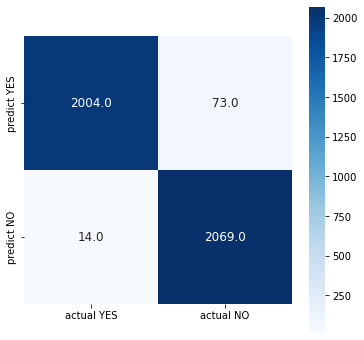

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y1_predict))

cf1=pd.DataFrame(confusion_matrix(y_test,y1_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf1,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [63]:
print('accuracy_score:',accuracy_score(y_test,y1_predict))

accuracy_score: 0.9790865384615385


In [64]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_train,z1_predict))

accuracy_score: 0.9865985576923076


In [65]:
#building the model(model2)
#DECISIONTREECLASSIFIER

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y2_predict=dtree.predict(X_test)
z2_predict=dtree.predict(X_train)

In [68]:
y2_predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [69]:
z2_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



<AxesSubplot:>

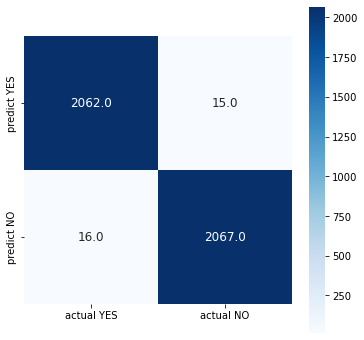

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y2_predict))
cf_matrix1=(pd.DataFrame(confusion_matrix(y_test,y2_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO']))
plt.figure(figsize=(6,6))
sns.heatmap(cf_matrix1,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':12},cmap='Blues')

In [71]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_test,y2_predict))

accuracy_score: 0.9925480769230769


In [72]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_train,z2_predict))

accuracy_score: 1.0


In [73]:
#building model(model3)
#support vector machine classifier

In [74]:
from sklearn import svm
svmc=svm.SVC(kernel='linear')
svmc.fit(X_train,y_train)

SVC(kernel='linear')

In [75]:
y3_predict=svmc.predict(X_test)
z3_predict=svmc.predict(X_train)

In [76]:
y3_predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [77]:
z3_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



<AxesSubplot:>

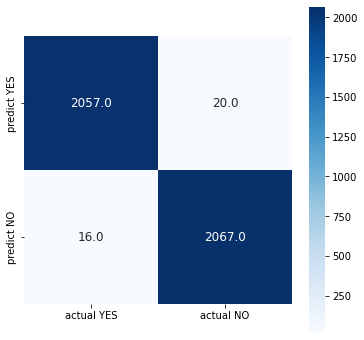

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y3_predict))
cf_matrix3=(pd.DataFrame(confusion_matrix(y_test,y3_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO']))
plt.figure(figsize=(6,6))
sns.heatmap(cf_matrix3,cbar=True,square=True,annot=True,fmt='0.1f',annot_kws={'size':12},cmap='Blues')

In [219]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_test,y3_predict))

accuracy_score: 0.9913461538461539


In [111]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_train,z3_predict))

accuracy_score: 0.9974158653846154


In [79]:
#building model(model4)
#RANDOMFORESTCLASSIFIER

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [81]:
y4_predict=rfc.predict(X_test)
z4_predict=rfc.predict(X_train)

In [82]:
y4_predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [83]:
z4_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



<AxesSubplot:>

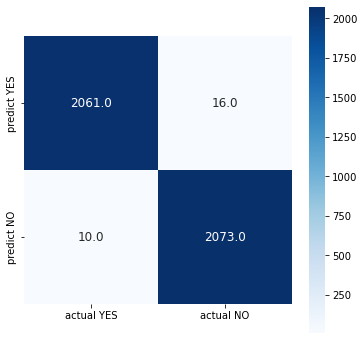

In [84]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y4_predict))
cf_matrix4=(pd.DataFrame(confusion_matrix(y_test,y4_predict),columns=['actual YES','actual NO'],index=['predict YES','predict NO']))
plt.figure(figsize=(6,6))
sns.heatmap(cf_matrix4,cbar=True,square=True,annot=True,fmt='0.1f',annot_kws={'size':12},cmap='Blues')

In [85]:
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_test,y4_predict))

accuracy_score: 0.99375


In [86]:
print('accuracy score:',accuracy_score(y_train,z4_predict))

accuracy score: 1.0


In [87]:
table={'model':['LogisticRegression','DesicionTreeClassifier','support vector machine classifier','RandomForest Classifier'],
      'accuracy(X_train)':[0.986,1.0,0.997,1.0],
      'accuracy(X_test)':[0.979,0.992,0.991,0.993]}

In [88]:
pd.DataFrame(table)

,model,accuracy(X_train),accuracy(X_test)
0,LogisticRegression,0.986,0.979
1,DesicionTreeClassifier,1.000,0.992
2,support vector machine classifier,0.997,0.991
3,RandomForest Classifier,1.000,0.993


In [89]:
#building a prediction system
#since Randomforestregression has better accuracy, so using it to build a prediction system

In [90]:
X_news4=X_test[0]

prediction4=rfc.predict(X_news4)
print(prediction4)

if (prediction4[0]==0):
    print('the news is real')
else:
    print('the news is fake')

[1]
the news is fake


In [91]:
print(y_test[0])

1


In [ ]:
#so oth the prediction and test are giving same value